<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/2-1%20%ED%9B%88%EB%A0%A8%20%EC%84%B8%ED%8A%B8%EC%99%80%20%ED%85%8C%EC%8A%A4%ED%8A%B8%20%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **지도 학습과 비지도 학습**

* **지도 학습(supervised learning)**: 훈련 데이터(입력(input)값과 타깃(target)값을 합친 것)가 필요한 알고리즘입니다. 

* **비지도 학습(unsupervised learning)**: 입력 데이터만 사용합니다. 타깃 데이터가 없으므로 정답을 맞힐 순 없지만 데이터를 잘 파악하거나 변형하기 좋습니다.

# **훈련 세트와 테스트 세트 준비**

도미와 빙어 데이터를 합친 전체 데이터를 준비하겠습니다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

전체 데이터를 리스트 하나로 생성하고, 타깃 데이터를 생성하겠습니다.

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14
print(fish_data)
print(fish_target)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


도미 샘플 35개를 훈련 세트로 생성하겠습니다.

In [ ]:
train_input = fish_data[:35]
train_target = fish_target[:35]

빙어 샘플 14개를 테스트 세트로 생성하겠습니다. 

In [ ]:
test_input = fish_data[35:]
test_target = fish_target[35:]

## **훈련 및 평가와 샘플링 편향**

`KNeighborsClassifier`의 인스턴스를 선언하겠습니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

훈련 세트로 모델을 훈련하고, 테스트 세트로 정확도를 평가하겠습니다.

In [ ]:
kn = kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

0.0


정확도가 0인 이유는 데이터를 섞지 않은 채 도미로만 훈련하고 빙어로만 평가했기 때문입니다. 이처럼 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한 쪽으로 쏠리는 **샘플링 편향(sampling bias)**이 발생합니다.

## **넘파이(Numpy)**

2차원 리스트인 `fish_data`와 `fish_target`을 넘파이 배열로 변환하고, 배열 크기를 확인하겠습니다.

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(f'input_arr:\n{input_arr}')
print(f'input_arr.shape: {input_arr.shape}')
print()
print(f'target_arr:\n {target_arr}') 
print(f'target_arr.shape: {target_arr.shape}')

input_arr:
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
input_arr.shape: (49, 2)

target_arr:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
target_arr.shap

## **무작위로 샘플 선택 후 훈련 세트와 테스트 세트 생성**

이제 샘플을 무작위로 섞어서 훈련 세트와 테스트 세트를 만들어야 합니다. 인덱스를 섞고 `input_arr`와 `target_arr`에 적용하여 샘플을 선택하면 무작위로 훈련 세트를 나누게 됩니다.

In [ ]:
# `seed()` 메서드에 매개변수를 지정하면 항상 같은 결과가 출력됩니다.
# 매개변수에 지정하는 숫자에 따라 특정 결과만 출력되는 것입니다.
np.random.seed(42)
index = np.arange(49)
# `index`를 섞어서 `index`의 원소 순서를 바꿉니다.
# `seed()` 메서드에 `42`를 지정했으므로 항상 같은 결과가 출력됩니다.
np.random.shuffle(index) 

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


섞은 `index`를 `input_arr`에 적용하여 배열 인덱싱 하고 훈련 세트를 생성하겠습니다.

In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
print(f'train_input:\n{train_input}')
print()
print(f'train_target:\n{train_target}')

train_input:
[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]

train_target:
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


섞은 `index`를 `input_arr`에 적용하여 배열 인덱싱 하고 테스트 세트를 생성하겠습니다.

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
print(f'test_input:\n{test_input}')
print()
print(f'test_target:\n{test_target}')

test_input:
[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]

test_target:
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


훈련 세트와 테스트 세트를 산점도로 그리겠습니다.

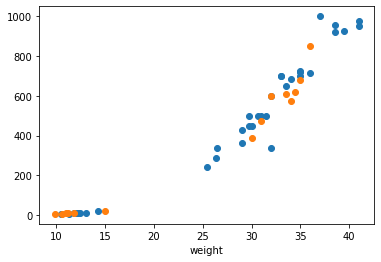

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 특성을 x축에, 두 번째 특성을 y축에 설정합니다. 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.xlabel('weight')

plt.show()

파란색은 훈련 세트, 주황색은 테스트 세트입니다.

# **모델 훈련 및 평가**

모델을 훈련하고 평가하겠습니다.

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

정확도는 100%입니다. 실제 타깃을 확인하겠습니다.

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

`test_target`의 데이터를 확인하겠습니다.

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

`kn.predict`로 예측한 값과 같습니다.

# **마무리**

## **키워드로 끝내는 핵심 포인트**

- 테스트 세트: 대체로 전체 데이터에서 *20~30%*를 테스트 세트로 사용합니다. 전체 데이터가 아주 크면 *1%*만 사용해도 충분합니다.

## **핵심 패키지와 함수**

`shuffle` 메서드는 다차원 배열이면 행만 섞습니다. 열은 안 섞지 않습니다.

In [ ]:
arr = np.array([[1, 2], [3, 4], [5, 6]])
np.random.shuffle(arr)
print(arr)

[[5 6]
 [1 2]
 [3 4]]
